In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [4]:
salary_data=pd.read_excel("Final data.xlsx",index_col=0)

In [5]:
salary_data.head()

,Country,Country code,Job,Currency Notation,Avg. salary,Min. salary,Max. salary,Cities,Variation,Male percent,Female percent,convert,Avg. salary (USD),Max. salary (USD),Min. salary (USD),Cost of living pm,First,Second,Third,Subsidiary
0,INDIA,IN,AGM,₹,1687306.0,628000.0,3000000.0,Mumbai,14,89.2,10.6,0.014,23622.284,42000.0,8792.0,28405.58,Project Management,Leadership,Business Development,"['Sales Management', 'People Management', 'Tea..."
1,INDIA,IN,AGM,₹,1687306.0,628000.0,3000000.0,New Delhi,11,89.2,10.6,0.014,23622.284,42000.0,8792.0,27215.80,Project Management,Leadership,Business Development,"['Sales Management', 'People Management', 'Tea..."
2,INDIA,IN,AGM,₹,1687306.0,628000.0,3000000.0,Bangalore,7,89.2,10.6,0.014,23622.284,42000.0,8792.0,26220.74,Project Management,Leadership,Business Development,"['Sales Management', 'People Management', 'Tea..."
3,INDIA,IN,AGM,₹,1687306.0,628000.0,3000000.0,Pune,4,89.2,10.6,0.014,23622.284,42000.0,8792.0,24736.68,Project Management,Leadership,Business Development,"['Sales Management', 'People Management', 'Tea..."
4,INDIA,IN,AGM,₹,1687306.0,628000.0,3000000.0,Delhi,-4,89.2,10.6,0.014,23622.284,42000.0,8792.0,27215.80,Project Management,Leadership,Business Development,"['Sales Management', 'People Management', 'Tea..."


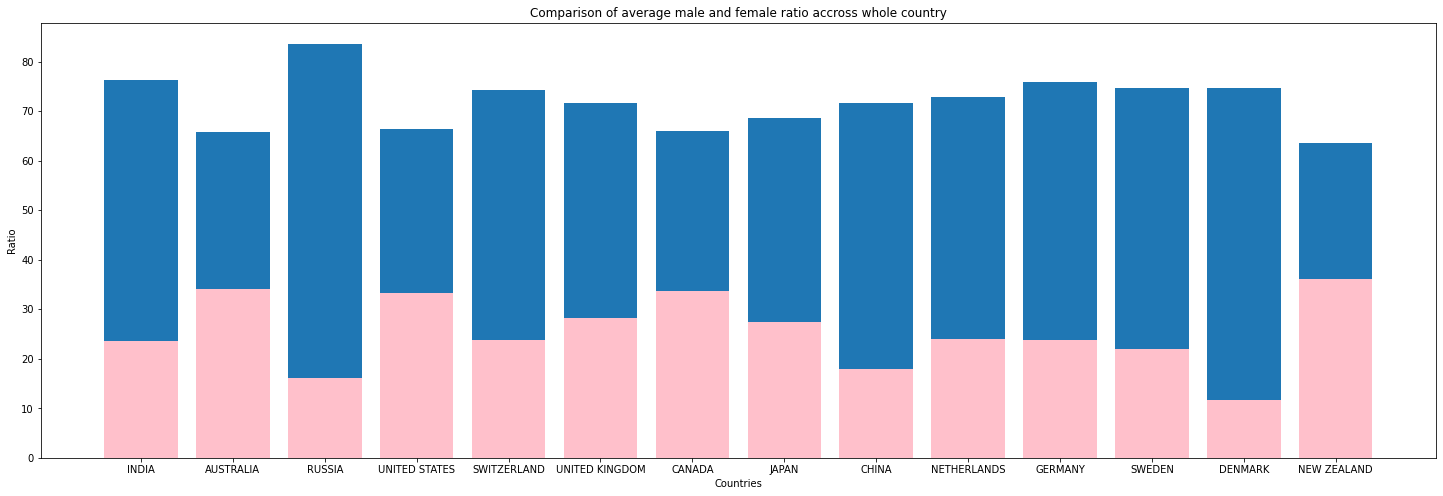

In [6]:
#Comparison of Male and Female Ratio For each country
countries=salary_data['Country'].unique()
mean_male_ratio_countries={}
mean_female_ratio_countries={}
for country in countries:
  country_df=salary_data[salary_data['Country']==country]
  
  mean_male_ratio_country=country_df['Male percent'].mean()
  mean_female_ratio_country=country_df['Female percent'].mean()
  mean_male_ratio_countries[country]=mean_male_ratio_country
  mean_female_ratio_countries[country]=mean_female_ratio_country
plt.figure(figsize=(25,8))
plt.bar(mean_male_ratio_countries.keys(),mean_male_ratio_countries.values())
plt.bar(mean_female_ratio_countries.keys(),mean_female_ratio_countries.values(),color='pink')
plt.title("Comparison of average male and female ratio accross whole country")
plt.xlabel('Countries')
plt.ylabel('Ratio')
plt.show()

In [7]:
salary_data['Cost of living pm (USD)']=salary_data['Cost of living pm']*salary_data['convert']

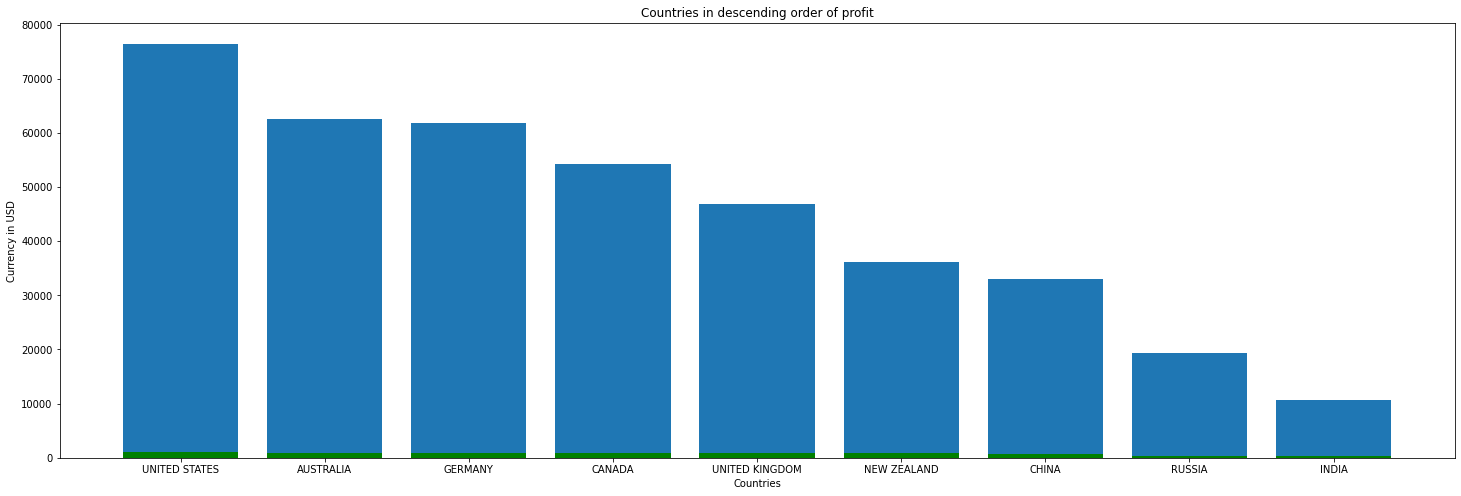

In [8]:
'''Countries in descending order of profit in which profit is the difference 
  between average cost of living of country and average of average salary of the 
  country
'''
average_sal='Avg. salary (USD)'
col='Cost of living pm (USD)'
mean_of_average_sal_for_countries={}
mean_of_col_for_countries={}
for country in countries:
  country_df=salary_data[salary_data['Country']==country]
  country_df=country_df[country_df[col]!=0]
  mean_of_average_sal_for_country=country_df[average_sal].mean()
  mean_of_col_for_country=country_df[col].mean()
  mean_of_average_sal_for_countries[country]=mean_of_average_sal_for_country
  mean_of_col_for_countries[country]=mean_of_col_for_country
pairs=[(country,mean_of_average_sal_for_countries[country],mean_of_col_for_countries[country]) for country in countries if not math.isnan(mean_of_col_for_countries[country])]
pairs.sort(key=lambda pair:(pair[1]-pair[2]),reverse=True)
sorted_countries,avg_avg_sal,avg_col=list(zip(*pairs))
plt.figure(figsize=(25,8))
plt.bar(sorted_countries,avg_avg_sal)
plt.bar(sorted_countries,avg_col,color='green')
plt.title("Countries in descending order of profit")
plt.xlabel('Countries')
plt.ylabel('Currency in USD')
plt.show()

In [9]:
'''Recommendation for Female about jobs'''
print("List of Jobs that has Avg Female Ratio > Avg Male Ratio")
jobs=salary_data['Job'].unique()
for job in jobs:
  job_df=salary_data[salary_data['Job']==job]
  if job_df['Female percent'].mean()>job_df['Male percent'].mean():
    print(job)

List of Jobs that has Avg Female Ratio > Avg Male Ratio
Primary School Teacher
Secondary School Teacher
High School Teacher
Accountant


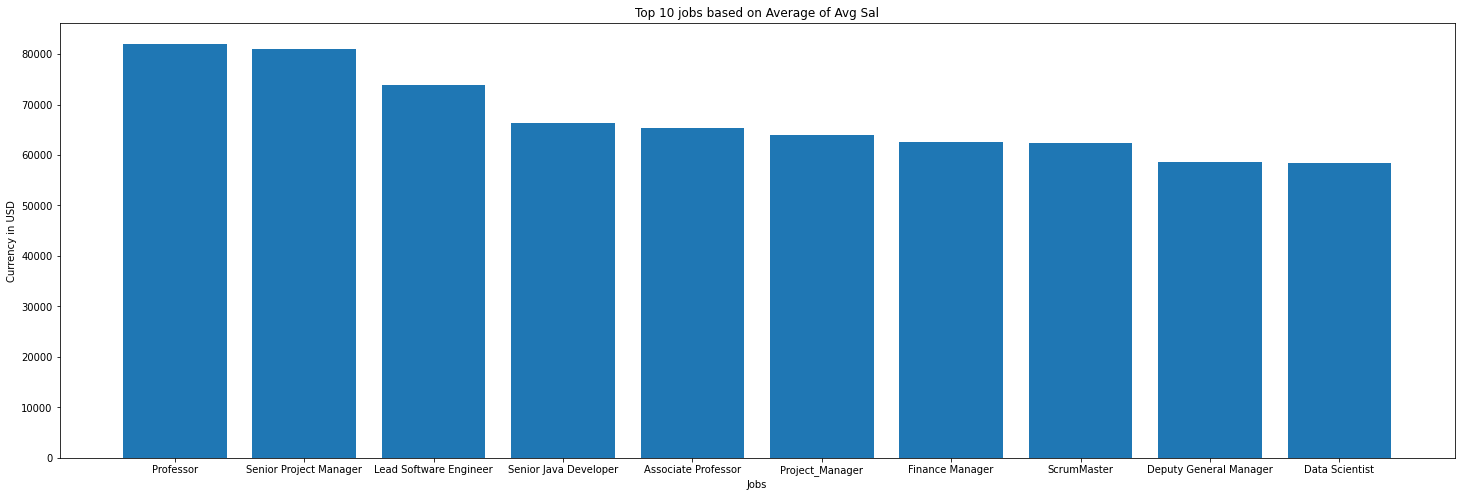

In [10]:
#TOP 10 jobs based on Avg Salary
job_salary_map={}
for job in jobs:
  job_df=salary_data[salary_data['Job']==job]
  avg_avg_sal=job_df[average_sal].mean()
  job_salary_map[job]=avg_avg_sal
new_df=pd.DataFrame(list(job_salary_map.items()),columns=["job",average_sal])

plt.figure(figsize=(25,8))
new_df=new_df.nlargest(10,average_sal)
plt.bar(new_df['job'],new_df[average_sal])
plt.title("Top 10 jobs based on Average of Avg Sal")
plt.xlabel('Jobs')
plt.ylabel('Currency in USD')
plt.show()

In [11]:
salary_data.to_excel('Final data.xlsx')